In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib ipympl

From the data that was gathered, we first make sure there are not a considerable amount of hot pixels. To do this, we look at the dark images which were captured by taking exposures with the cap cover over the CCD camera.

In [13]:
# Define the folder paths
dark_path    = '..\\01-Data\darks'

# List all CSV files in the folder
dark_files    = [f for f in os.listdir(dark_path) if f.endswith('.csv')]

# Load all CSV files into a list of dataframes
dark_data    = [np.loadtxt(os.path.join(dark_path, file), delimiter=';') for file in dark_files]

In [14]:
# Calculates the master dark, flat and cleaned beam
# by taking the mean of all the measurements
master_dark = np.mean(dark_data, axis=0)

Text(0.5, 1.0, 'Master Dark')

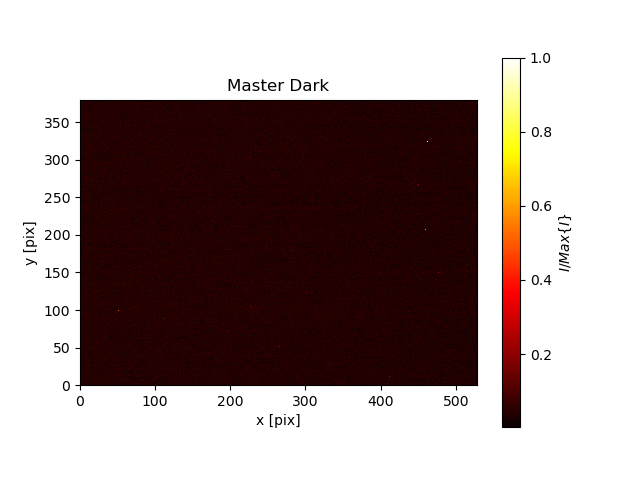

In [15]:
# Plots the master dark
fig,ax = plt.subplots()
ax.pcolormesh(master_dark / np.max(master_dark), label='Master Dark', cmap = 'hot')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')

# Sets a colourbar
cbar = plt.colorbar(ax.pcolormesh(master_dark / np.max(master_dark), cmap = 'hot'))
# cbar = plt.colorbar(ax.pcolormesh(master_dark, cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')
ax.set_aspect('equal')
ax.set_title('Master Dark')

We don't see very many hot spots. Thus no further action needs to be taken to remove any hot pixels